In [ ]:
import sys
sys.path.append("/Users/shvimas/Desktop/GitHub/diploma/src")

In [3]:
%matplotlib inline
from importlib import reload
import matplotlib.pyplot as pl
from data_helpers import read_data, array2str
import VG_Pricing_Integral_vectorized as vg
from pars_range import Range, ParsRange

pl.rcParams["figure.figsize"] = (15, 9)

In [4]:
try:
    info, scall, sput, pcall, pput = read_data("../SPH2_031612.csv")
except FileNotFoundError:
    info, scall, sput, pcall, pput = read_data("SPH2_031612.csv")

In [5]:
day = 0
rate = .03
q = rate
maturity = info[day].mat / len(info)
spot = info[day].spot
is_call = True
if is_call:
    strikes = scall[day]
    prices = pcall[day]
else:
    strikes = sput[day]
    prices = pput[day]
    
strikes = strikes[:-10]
prices = prices[:-10]

args = (spot, strikes, maturity, rate, q, is_call)


In [6]:
nu_range = Range(min=.01, max=1, num=1)
theta_range = Range(min=-.5, max=.5, num=2)
sigma_range = Range(min=.05, max=.25, num=10)

pars = ParsRange(model="vg", center=(1.417, .0718, 0.5), widths=(.4, .02, .1), dots=64)
pars.nu_range = nu_range
pars.theta_range = theta_range
pars.sigma_range = sigma_range
print(pars.nu_range.num)
print(pars.theta_range.num)
print(pars.sigma_range.num)


1
2
10


In [7]:
predicted = []
for params in pars:
    predicted.append(strikes)
    predicted.append(vg.price_vg(pars=params, args=args))
    predicted.append("grey")

/Users/shvimas/Desktop/GitHub/diploma/src/VG_Pricing_Integral_vectorized.py:73: RuntimeWarning: overflow encountered in power
  return temp / ((1 - om1i * theta * nu + 0.5 * sigma2 * nu * om ** 2) ** (tau / nu))
/Users/shvimas/Desktop/GitHub/diploma/src/VG_Pricing_Integral_vectorized.py:73: RuntimeWarning: invalid value encountered in true_divide
  return temp / ((1 - om1i * theta * nu + 0.5 * sigma2 * nu * om ** 2) ** (tau / nu))


/Users/shvimas/Desktop/GitHub/diploma/src/VG_Pricing_Integral_vectorized.py:73: RuntimeWarning: overflow encountered in true_divide
  return temp / ((1 - om1i * theta * nu + 0.5 * sigma2 * nu * om ** 2) ** (tau / nu))


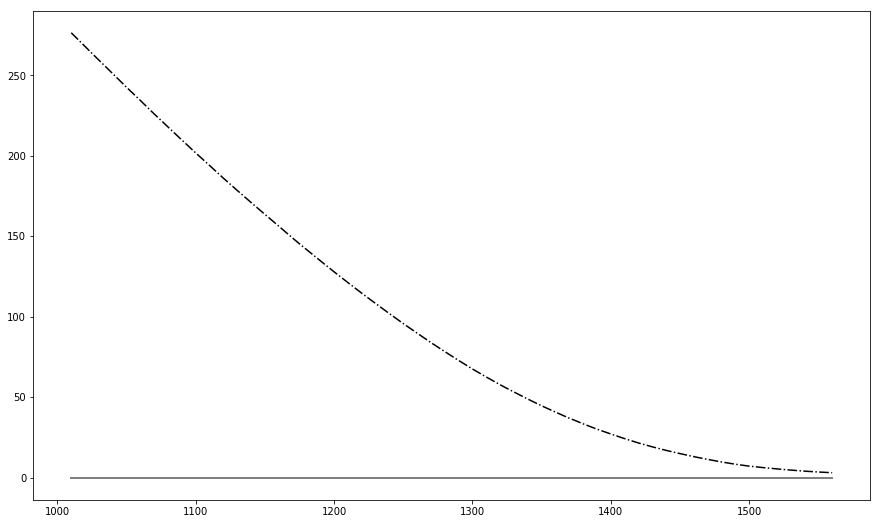

In [8]:
p = pl.plot(*predicted,
            strikes, prices, "k-.")


In [9]:
for params in pars.generate():
    print(params)

(0.01, -0.5, 0.05)
(0.01, -0.5, 0.07222222222222223)
(0.01, -0.5, 0.09444444444444444)
(0.01, -0.5, 0.11666666666666667)
(0.01, -0.5, 0.1388888888888889)
(0.01, -0.5, 0.16111111111111112)
(0.01, -0.5, 0.18333333333333335)
(0.01, -0.5, 0.20555555555555555)
(0.01, -0.5, 0.2277777777777778)
(0.01, -0.5, 0.25)
(0.01, 0.5, 0.05)
(0.01, 0.5, 0.07222222222222223)
(0.01, 0.5, 0.09444444444444444)
(0.01, 0.5, 0.11666666666666667)
(0.01, 0.5, 0.1388888888888889)
(0.01, 0.5, 0.16111111111111112)
(0.01, 0.5, 0.18333333333333335)
(0.01, 0.5, 0.20555555555555555)
(0.01, 0.5, 0.2277777777777778)
(0.01, 0.5, 0.25)
